In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import math
import time
import statsmodels.formula.api as smf  # for doing statistical regression
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as smd

from data_functions import *
from subset_functions import *
from model_functions import *
from search_functions import *
from analysis_functions import *

import matplotlib.pyplot as plt
#% matplotlib inline

dir_results = '../results'


In [3]:
def real_data_RDSS(dir_data, file_json, subsample, plotting_data, verbose_data, obs_model, data_type, f_base, k, verbose_search, plotting_search):

    seed = 43
    np.random.seed(seed)

    # Get data
    x, y, z, T, x_cols, inst, discont = data_real(dir_data, file_json, subsample=subsample, plotting=plotting_data, verbose=verbose_data)

    # Search for discontinuity
    x, x_means, x_stds = normalize_xz(x, z)
    llrs, neighs, subsets_best, beta_0_n, beta_1_n, T_fx, llrs_n, llrs_a, centers_n, pivots_best, subset_imax = \
    RDSS_residual(obs_model, T, x, z, f_base=f_base, all_points=False, k=k, verbose=verbose_search, plotting=plotting_search)
    x = unnormalize_xz(x, z, x_means, x_stds)

    # Plot the best
    max_arg = np.argmax(llrs)
    plot_neigh(x, z, out=T, out_name='Top subset', neigh=[subset_neigh(neighs[:,max_arg], subsets_best[max_arg]),subset_neigh(neighs[:,max_arg], ~subsets_best[max_arg])])
    plt.hist(llrs, bins=100); plt.show()
    
    return llrs, neighs, subsets_best, beta_0_n, beta_1_n, T_fx, llrs_n, llrs_a, centers_n, pivots_best, subset_imax

### TO DO
- Rand testing as option
- More descriptive outputs of where the significant subsets are

('binary/categorical col #', 3)
('binary/categorical col #', 6)
('Starting RDSS searching for k =', 100, '...')
Getting neighbors...
Fitting model...
('basic_fit', 'Logit_poly1', True)
Optimization terminated successfully.
         Current function value: 0.018267
         Iterations 15
fitted model!
Computing bernoulli probabilities ...


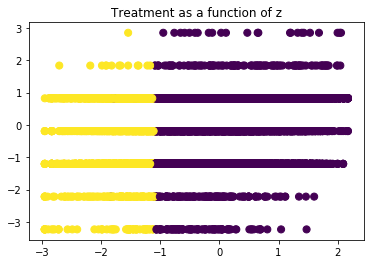

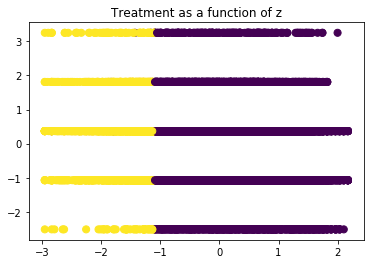

Starting search over neighs...


('Finished RDSS search in', 2688.8596930503845, 'seconds')


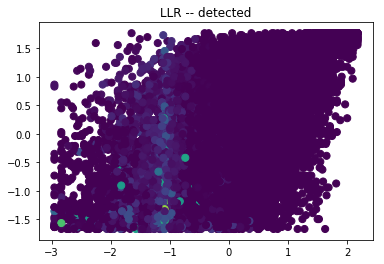

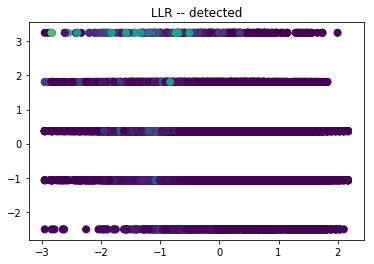

TODO: plot beta0 and beta1 for multiple dim


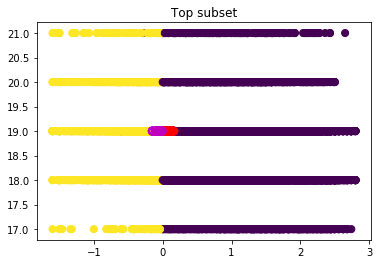

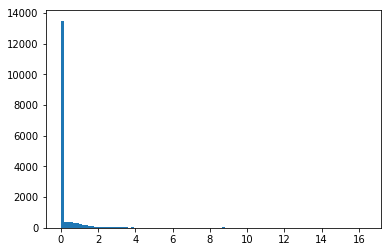

In [5]:
########################################################################
# GPA
########################################################################

# Data
dir_data = 'AcademicProbation_LSO_2010'
file_json = 'data_inst.json'
subsample = 16834

plotting_data = False
verbose_data = False

# Search
obs_model = 'bernoulli'    # {'normal', 'bernoulli'}
data_type ='binary'        # {'cont', 'binary'}
f_base    = 'Logit_poly1'  # {'OLS_poly1', 'Logit_poly1',
k = 100
verbose_search = True
plotting_search = True

llrs, neighs, subsets_best, beta_0_n, beta_1_n, T_fx, llrs_n, llrs_a, centers_n, pivots_best, subset_imax = \
real_data_RDSS(dir_data, file_json, subsample, plotting_data, verbose_data, obs_model, data_type, f_base, k, verbose_search, plotting_search)

Starting RDSS searching for k = 100 ...
Getting neighbors...


/Users/wh/Documents/python3_venv/venv/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/wh/Documents/python3_venv/venv/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fitting model...
basic_fit Logit_poly1 True
         Current function value: 0.000000
         Iterations: 35
fitted model!
Computing bernoulli probabilities ...


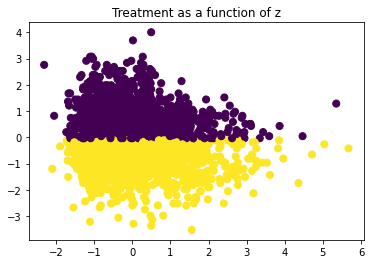

Starting search over neighs...


/Users/wh/Desktop/CMU/RD_search/src/subset_functions.py:120: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(dist_center, dist_pivot[ii, :]) / \


Finished RDSS search in 367.74402260780334 seconds


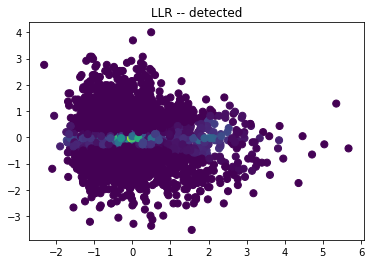

TODO: plot beta0 and beta1 for multiple dim


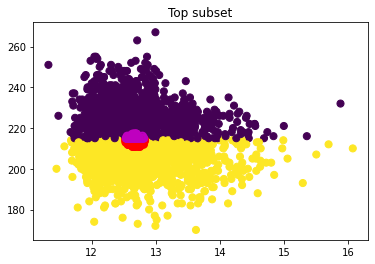

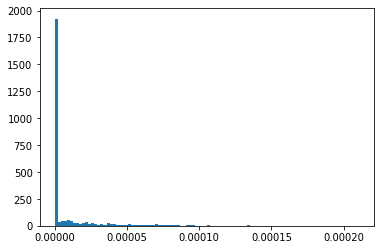

In [5]:
########################################################################
# Test Score 2012
########################################################################

# Data
dir_data = 'test_score_2012'
file_json = 'data_inst.json'
subsample = 2605
plotting_data = False
verbose_data = False

# Search
obs_model = 'normal'    # {'normal', 'bernoulli'}
data_type = 'cont'        # {'cont', 'binary'}
f_base    = 'OLS_poly1'  # {'OLS_poly1', 'Logit_poly1',


obs_model = 'bernoulli'    # {'normal', 'bernoulli'}
data_type = 'cont'        # {'cont', 'binary'}
f_base    = 'Logit_poly1'  # {'OLS_poly1', 'Logit_poly1',

k = 100
verbose_search = True
plotting_search = True

llrs, neighs, subsets_best, beta_0_n, beta_1_n, T_fx, llrs_n, llrs_a, centers_n, pivots_best, subset_imax = \
real_data_RDSS(dir_data, file_json, subsample, plotting_data, verbose_data, obs_model, data_type, f_base, k, verbose_search, plotting_search)



Starting RDSS searching for k = 100 ...
Getting neighbors...
Fitting model...
basic_fit OLS_poly3 True
fitted model!
Computing residuals, r_i = \epsilon_i ...
Precomputing variance, sigma_i ...


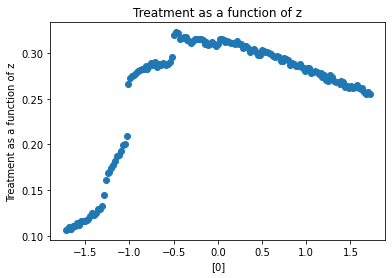

/Users/wh/Desktop/CMU/RD_search/src/subset_functions.py:120: RuntimeWarning: invalid value encountered in true_divide
  angle = np.arccos(np.dot(dist_center, dist_pivot[ii, :]) / \
/Users/wh/Desktop/CMU/RD_search/src/subset_functions.py:128: RuntimeWarning: invalid value encountered in greater_equal
  neighs[:, ii] = (1 <= quadrant) | (quadrant >= 2)
/Users/wh/Documents/python3_venv/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/wh/Documents/python3_venv/venv/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Starting search over neighs...


Finished RDSS search in 3.2601306438446045 seconds


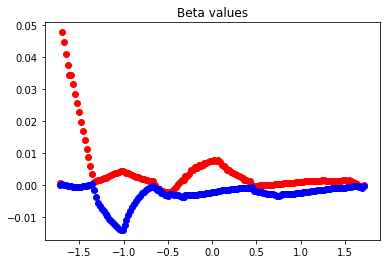

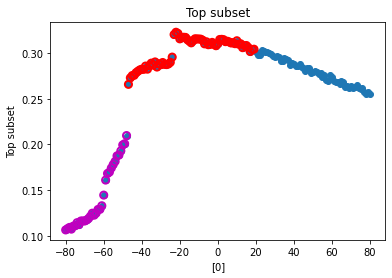

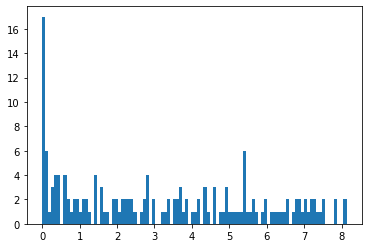

In [4]:
########################################################################
# ED visits
########################################################################

# Data
dir_data = 'ED_visits'
file_json = 'data_inst_self.json'
subsample = False
plotting_data = False
verbose_data = False

# Search
obs_model = 'normal'       # {'normal', 'bernoulli'}
data_type = 'cont'         # {'cont', 'binary'}
f_base    = 'OLS_poly3'    # {'OLS_poly1', 'Logit_poly1',
k = 100
verbose_search = True
plotting_search = True

llrs, neighs, subsets_best, beta_0_n, beta_1_n, T_fx, llrs_n, llrs_a, centers_n, pivots_best, subset_imax = \
real_data_RDSS(dir_data, file_json, subsample, plotting_data, verbose_data, obs_model, data_type, f_base, k, verbose_search, plotting_search)